In [1]:
import pandas as pd
df = pd.read_csv('data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt
#한글설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [2]:
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,능남고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,100,85,90,95,95,C#


In [3]:
df.loc['7번', '학교'] = '남능고'
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,100,85,90,95,95,C#


In [4]:
group=df.groupby('학교')['키'].mean()
group

학교
남능고    189.333333
능남고    196.000000
북산고    184.800000
산북고    190.000000
Name: 키, dtype: float64

In [5]:
shcool = group.index
height = group.values
shcool, height

(Index(['남능고', '능남고', '북산고', '산북고'], dtype='object', name='학교'),
 array([189.33333333, 196.        , 184.8       , 190.        ]))

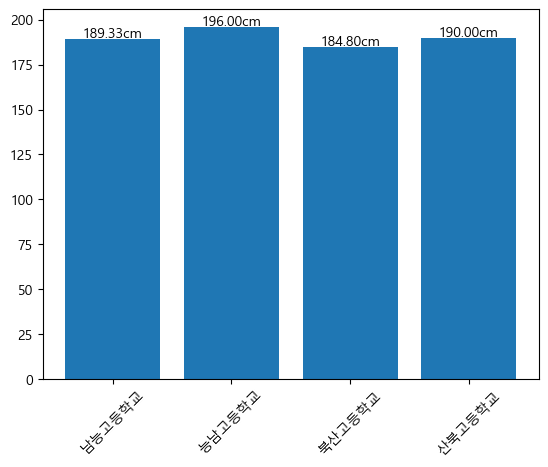

In [6]:
plt.bar(shcool, height)
for idx, h in enumerate(height):
    plt.text(idx, h+1, f'{h:.2f}cm', ha='center')
plt.xticks(shcool, [s+'등학교' for s in shcool], rotation=45)
plt.show()

In [7]:
#학교별 학생수를 막대그래프로 출력
group = df.groupby('학교').size()
group

학교
남능고    3
능남고    2
북산고    5
산북고    3
dtype: int64

In [8]:
school = group.index
count = group.values

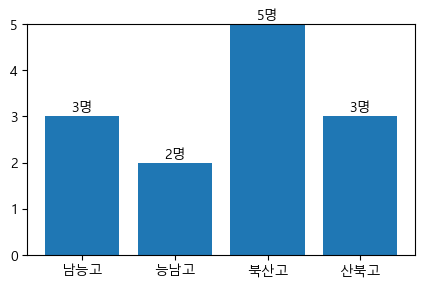

In [9]:
plt.figure(figsize=(5, 3))
plt.bar(school, count)
for idx, c in enumerate(count):
    plt.text(idx, c+0.1, f'{c}명', ha='center')
plt.ylim(0, 5)
plt.show()

In [10]:
df['SW특기'] = df['SW특기'].str.capitalize()
df.fillna({'SW특기':'없음'}, inplace=True)
df

,이름,학교,키,국어,영어,수학,과학,사회,SW특기
지원번호,,,,,,,,,
1번,채치수,북산고,197,90,85,100,95,85,Python
2번,정대만,북산고,184,40,35,50,55,25,Java
3번,송태섭,북산고,168,80,75,70,80,75,Javascript
4번,서태웅,북산고,187,40,60,70,75,80,Java
5번,강백호,북산고,188,15,20,10,35,10,Java
6번,변덕규,능남고,202,80,100,95,85,80,C#
7번,황태산,남능고,188,55,65,45,40,35,Python
8번,윤대협,능남고,190,100,85,90,95,95,C#
9번,홍길동,산북고,190,100,85,90,95,95,C#


In [11]:
group = df.groupby('SW특기').size()

In [12]:
sw = group.index
count = group.values
sw, count

(Index(['C#', 'Java', 'Javascript', 'Python'], dtype='object', name='SW특기'),
 array([3, 5, 1, 4]))

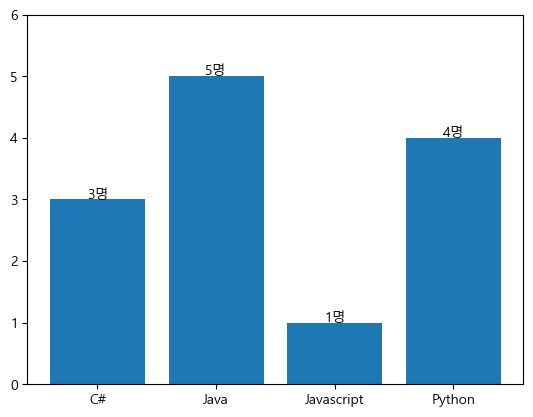

In [13]:
plt.bar(sw, count)
for idx, c in enumerate(count):
    plt.text(idx, c+0.02, f'{c}명', ha='center')
plt.ylim(0, max(count)+1)
plt.yticks([y for y in range(0, max(count)+2, 1)])
plt.show()

In [14]:
#학교별 평균점수를 막대그래프로 출력

df['평균'] = df.apply(lambda row: row['국어':'사회'].mean(), axis=1)
group = df.groupby('학교')['평균'].mean()
group

학교
남능고    77.333333
능남고    90.500000
북산고    58.200000
산북고    91.466667
Name: 평균, dtype: float64

In [15]:
school = group.index
avg = group.values

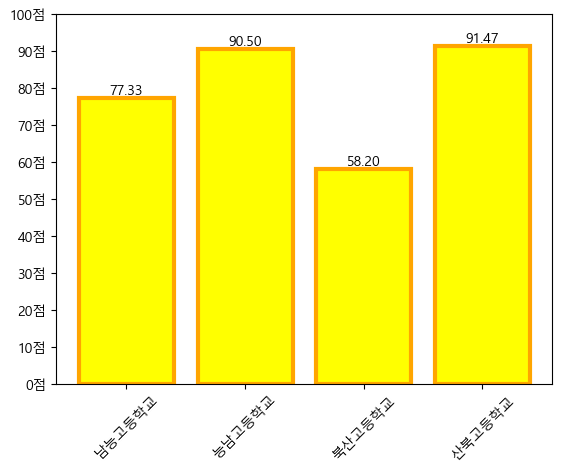

In [16]:
plt.bar(school, avg, color='yellow', ec='orange', lw=3)
for idx, a in enumerate(avg):
    plt.text(idx, a+1, f'{a:.2f}', ha='center')
plt.ylim(0, 100)
yticks=[y for y in range(0, 101, 10)]
plt.yticks(yticks, [f'{y}점' for y in yticks])
plt.xticks(shcool, [s+'등학교' for s in shcool], rotation=45)
plt.show()

In [17]:
#학생별 키 막대그래프
import pandas as pd
df = pd.read_csv('c:/python/04.데이터시각화/data/score.csv', index_col='지원번호')

import matplotlib.pyplot as plt
#한글설정
plt.rc('font', family = 'Malgun Gothic')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

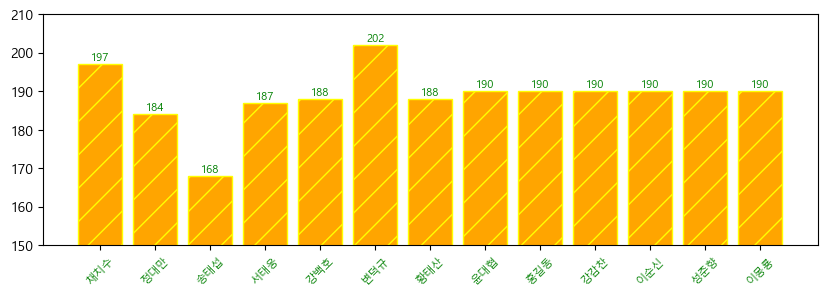

In [18]:
name = df['이름']
height = df['키']
plt.figure(figsize=(10, 3))
plt.ylim(150, 210)
plt.bar(name, height, color='orange', hatch='/', ec='yellow')
plt.xticks(name, rotation=45, size=8, color='g')
for idx, h in enumerate(height):
    plt.text(idx, h+1, h, ha='center', color='g', size=8)

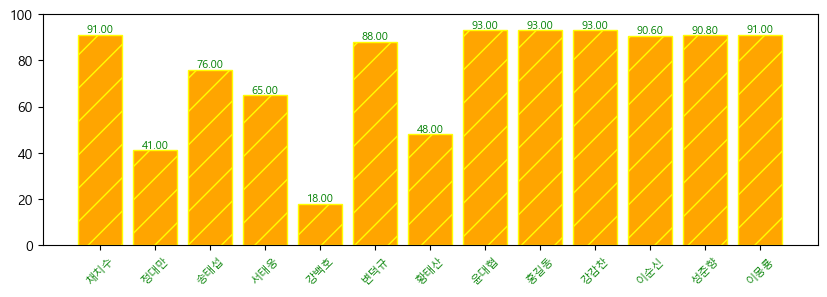

In [19]:
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
name = df['이름']
avg = df['평균']
plt.figure(figsize=(10, 3))
plt.ylim(0, 100)
plt.bar(name, avg, color='orange', hatch='/', ec='yellow')
plt.xticks(name, rotation=45, size=8, color='g')
for idx, h in enumerate(avg):
    plt.text(idx, h+1, f'{h:.2f}', ha='center', color='g', size=8)

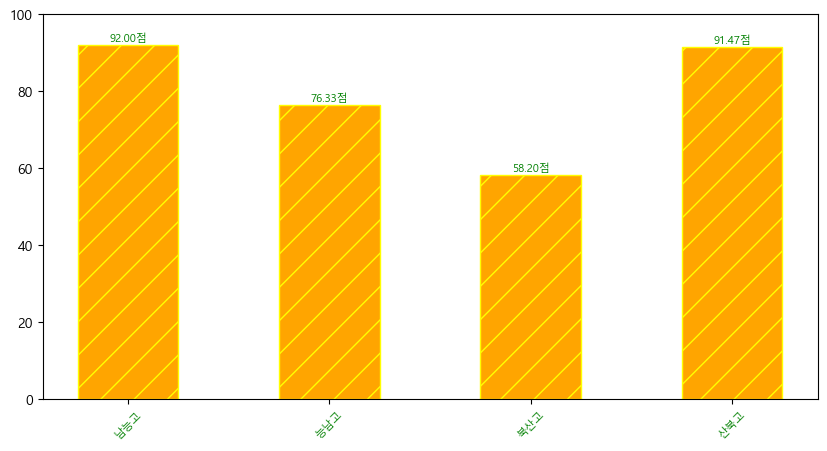

In [20]:
#4.학교별 평균점수
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)
group = df.groupby('학교')['평균'].mean()
labels = group.index
values = group.values
plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.bar(labels, values, color='orange', hatch='/', ec='yellow', width=0.5)
plt.xticks(labels, rotation=45, size=8, color='g')
for idx, value in enumerate(values):
    plt.text(idx, value+1, f'{value:.2f}점', ha='center', color='g', size=8)


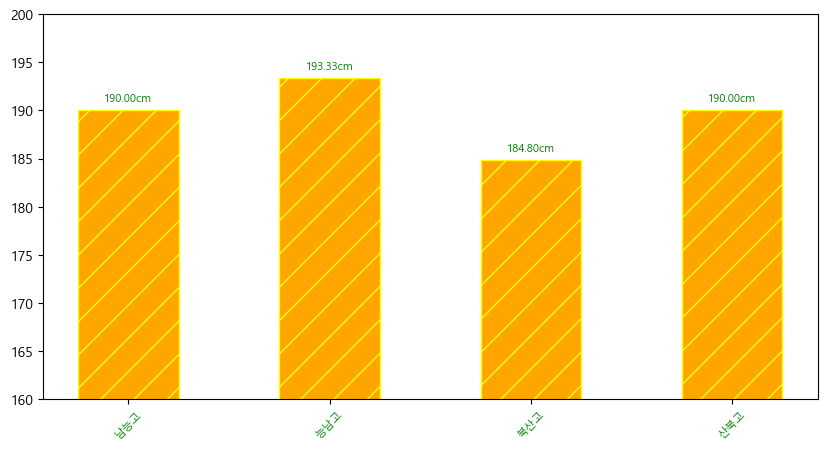

In [21]:
#3. 학교별 평균키
group = df.groupby('학교')['키'].mean()
labels = group.index
values = group.values
plt.figure(figsize=(10, 5))
plt.ylim(160, 200)
plt.bar(labels, values, color='orange', hatch='/', ec='yellow', width=0.5)
plt.xticks(labels, rotation=45, size=8, color='g')
for idx, value in enumerate(values):
    plt.text(idx, value+1, f'{value:.2f}cm', ha='center', color='g', size=8)

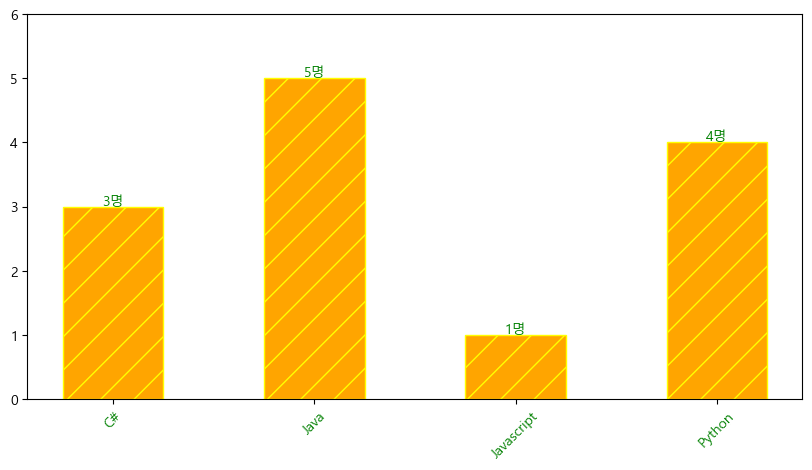

In [22]:
#5.SW특기별인원수
df['SW특기'] = df['SW특기'].str.capitalize()
group = df.groupby('SW특기').size()
labels = group.index
values = group.values
plt.figure(figsize=(10, 5))
plt.ylim(0, 6)
plt.bar(labels, values, color='orange', hatch='/', ec='yellow', width=0.5)
plt.xticks(labels, rotation=45, size=10, color='g')
for idx, value in enumerate(values):
    plt.text(idx, value+0.03, f'{value}명', ha='center', color='g', size=10)

In [23]:
#학생별(이름) 평균점수
enroll = pd.read_csv('data/수강.csv')
group=enroll.groupby('학생번호')['점수'].mean().to_frame()
stu = pd.read_csv('data/학생.csv')
merge = stu.merge(group, how='left', on='학생번호')
merge.fillna({'점수':0}, inplace=True)
merge

,학생번호,학생이름,학생학과,학년,생년월일,지도교수,점수
0,92414029,서연우,전산,3,73/10/06,228,81.250000
1,92414033,김창덕,전산,4,73/10/26,221,82.500000
2,92514009,이지행,전자,4,73/11/16,311,77.500000
3,92514023,김형명,전자,4,73/08/29,311,70.000000
4,92454018,이원구,건축,3,74/09/30,509,90.000000
5,95454003,이재영,건축,4,76/02/06,509,81.000000
6,95414058,박혜경,전산,4,76/03/12,221,83.333333
7,96414404,김수정,전산,3,77/12/22,228,75.000000
8,96414405,홍길동,전산,3,77/12/22,228,0.000000


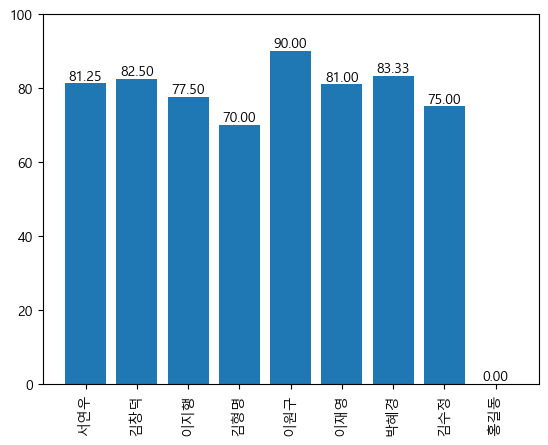

In [24]:
#학생별 평균점수 막대그래프
plt.bar(merge['학생이름'], merge['점수'])
plt.ylim(0, 100)
plt.xticks(merge['학생이름'], rotation=90)
for idx, grade in enumerate(merge['점수']):
    plt.text(idx, grade+1, f'{grade:.2f}', ha='center')


In [25]:
#강좌별(이름) 평균

In [26]:
#강좌별(이름) 평균 막대그래프

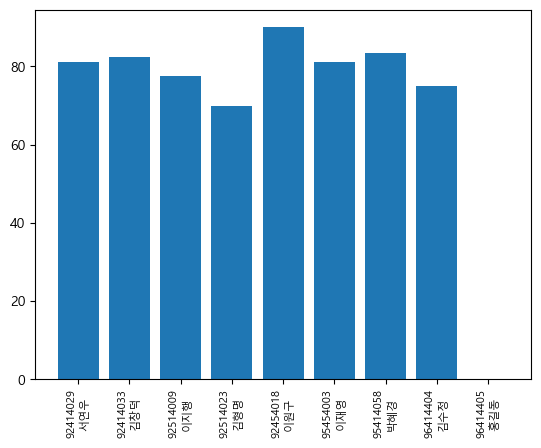

In [27]:
nos = merge['학생번호']
names = merge['학생이름']
grades = merge['점수']
xticks = [f'{nos[idx]}\n{names[idx]}' for idx, x in enumerate(nos)]
plt.bar(names, grades)
plt.xticks(names, xticks, rotation=90, size=8)
plt.show()

In [28]:
group = enroll.groupby('강좌번호')['점수'].mean().to_frame()
cou = pd.read_csv('data/강좌.csv')
merge = cou.merge(group, how='left', on='강좌번호')
merge.fillna({'점수':0}, inplace=True)

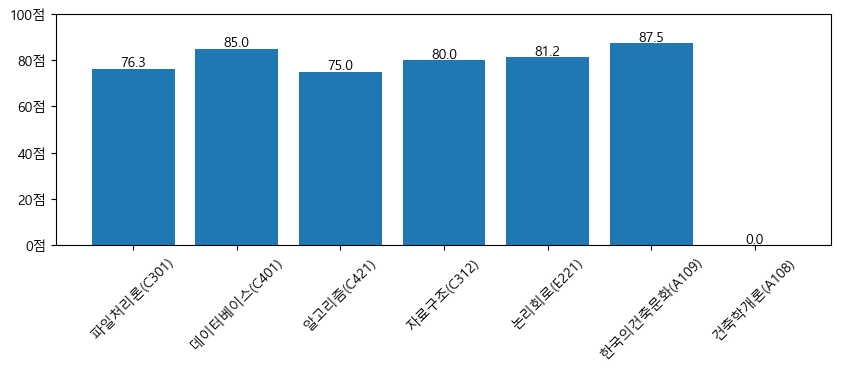

In [29]:
nos = merge['강좌번호']
names = merge['강좌이름']
grades = merge['점수']
plt.figure(figsize=(10, 3))
plt.bar(names, grades)

xticks = [f'{names[idx]}({nos[idx]})' for idx in range(len(nos))]
plt.xticks(names, xticks, rotation=45)

yticks = [y for y in range(0, 101, 20)]
plt.yticks(yticks, [f'{y}점' for y in yticks])

plt.ylim(0, 100)
for idx in range(len(nos)):
    plt.text(idx, grades[idx]+1, f'{grades[idx]:.1f}', ha='center')
plt.show()

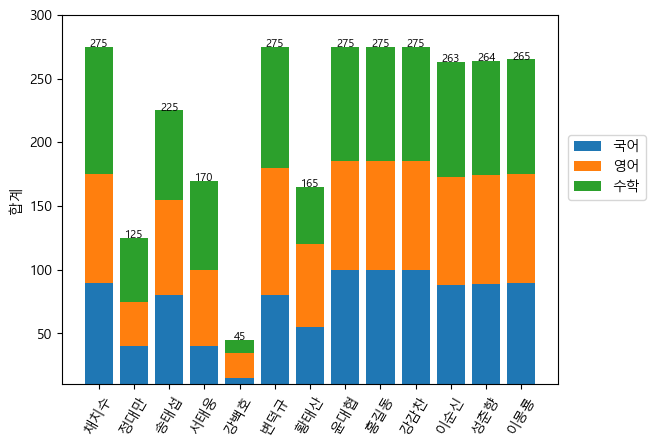

In [51]:
plt.bar(df['이름'], df['국어'], label='국어')
plt.bar(df['이름'], df['영어'], bottom=df['국어'], label='영어')
plt.bar(df['이름'], df['수학'], bottom=df['국어'] + df['영어'], label='수학')
plt.xticks(rotation=60)
plt.ylim(10, 300)
plt.legend(loc=(1.02, 0.5))
plt.ylabel('합계')

for i, idx in enumerate(df.index):
    sum = df.loc[idx,'국어'] + df.loc[idx,'영어'] + df.loc[idx,'수학']
    plt.text(i, sum, sum, ha='center', size=8)
plt.show()

In [54]:
df2 = df.copy()
df2.reset_index(inplace=True)
df2

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0
8,9번,홍길동,산북고,190,100,85,90,95,95,C#,93.0
9,10번,강감찬,남능고,190,100,85,90,95,95,Java,93.0


In [66]:
x = df2.index * 4
x

RangeIndex(start=0, stop=52, step=4)

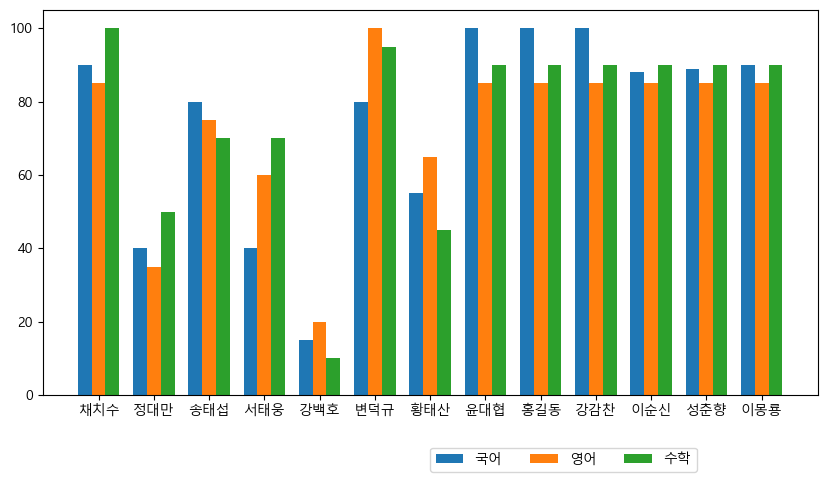

In [83]:
plt.figure(figsize=(10, 5))
plt.bar(x+0, df2['국어'], width=1, label='국어')
plt.bar(x+1, df2['영어'], width=1, label='영어')
plt.bar(x+2, df2['수학'], width=1, label='수학')
xticks = [xtick+1 for xtick in x]
plt.xticks(xticks, df['이름'])
plt.legend(loc=(0.5, -0.2), ncol=3)
plt.show()
